<IPython.core.display.Javascript object>


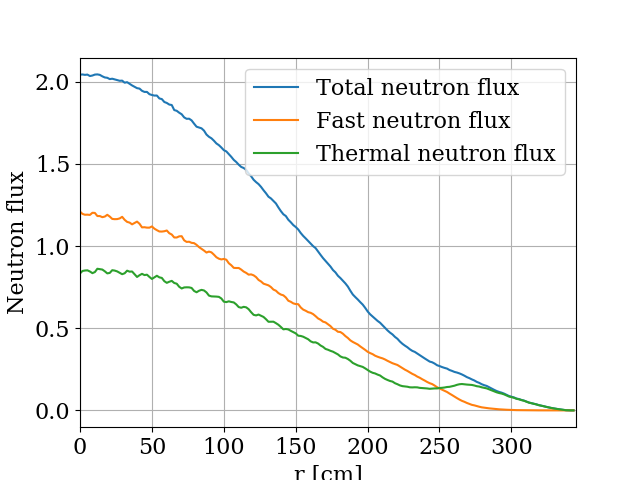

<IPython.core.display.Javascript object>


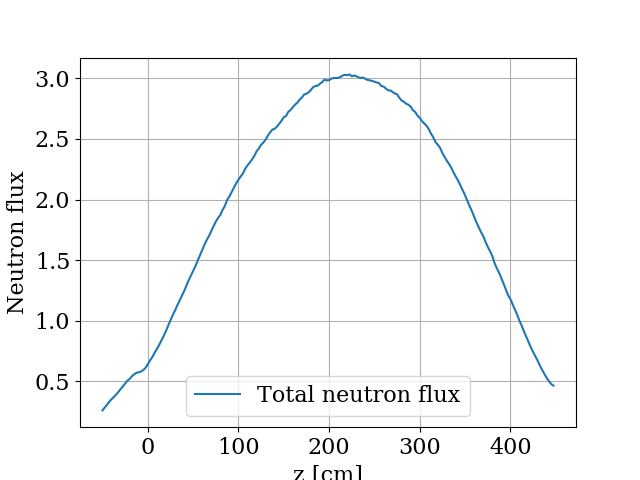

<IPython.core.display.Javascript object>


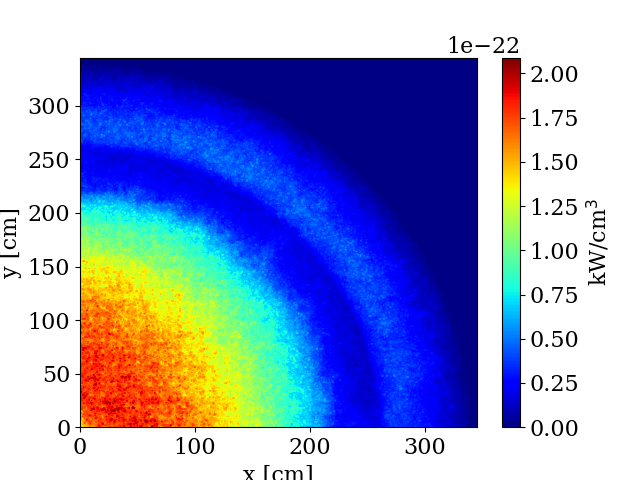

In [74]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import scipy
import matplotlib.pyplot
from matplotlib import rcParams, cm
from pyne import serpent
from pyne import nucname
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
det0 = serpent.parse_det('../serpent/core_det0.m')
#det0 = serpent.parse_det('../neutronics_paper/check_ratio/core_det0.m')

#det10 = serpent.parse_det('../axial_reflector/core_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
# Power generation distribution
x_pow = det0['DETpowxyX']
y_pow = det0['DETpowxyY']
pow_den_raw = det0['DETpowxy']
x = det0['DETflux_radX']
z = det0['DETflux_axialZ']
flux_rad = det0['DETflux_rad']
flux_rad_1 = det0['DETflux_rad1']
flux_rad_2 = det0['DETflux_rad2']
flux_axial = det0['DETflux_axial']
#tot_flux_rad  = np.reshape (flux_rad[:,1],  (len(x),4))
#fast_flux_rad = np.reshape (flux_rad_1[:,1], (len(x),4))
#ther_flux_rad = np.reshape (flux_rad_2[:,1], (len(x),4))
pow_cell_vol = (449.58-0)*(x_pow[1,0]-x_pow[0,0])   # Volume of POW generation mesh cell
pow_den = np.reshape (pow_den_raw[:,10], (len(x_pow), len(y_pow))) / (pow_cell_vol*10e+3) # Convert from W to kW

#print x_pow[:,0]
#print pow_cell_vol
#print pow_den
#print tot_flux_rad[:,3]
#print flux_rad_1[:,10]
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.05)
ax.set_xlim(0.0,345.0)
ax.plot(x[:,0], flux_rad[:,10], '-', label='Total neutron flux')
ax.plot(x[:,0], flux_rad_1[:,10], '-', label='Fast neutron flux')
ax.plot(x[:,0], flux_rad_2[:,10], '-', label='Thermal neutron flux')
ax.legend(loc=0)
ax.set_ylabel('Neutron flux')
ax.set_xlabel('r [cm]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2017-msbr-geo/figures/figure_3_1.png',bbox_inches='tight')
# Initialize figure
fig_2 = matplotlib.pyplot.figure(2)
ax = fig_2.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.05)
#ax.set_xlim(-345.0,345.0)
#ax.semilogx(energy, spectrum_grid[:,10], '-', label='Averaged', color='#ff8100')
ax.plot(z[:,0], flux_axial[:,10], '-', label='Total neutron flux')
#ax.semilogx(energy_grid[:,2], spectrum_grid_II[:,10]/np.trapz(spectrum_grid_II[:,10],energy_grid[:,2]), '-', label='Zone II', color='#ff8100')
#ax.semilogx(energy_p, (np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*0.95*spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
#ax.set_ylim(ax.get_ylim()[::-1]) # flip y axis
ax.legend(loc=0)
ax.set_ylabel('Neutron flux')
ax.set_xlabel('z [cm]')
#ax.set_title(plot_title)
fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2017-msbr-geo/figures/figure_3_1.png',bbox_inches='tight')
# Create heatmap
fig_3 = matplotlib.pyplot.figure(3)
ax = fig_3.add_subplot(111)
pc = ax.pcolor(pow_den,cmap=cm.jet)
#ax.grid(True)
#ax.imshow(pow_den, cmap='coolwarm', interpolation='nearest')
ax.contourf(x_pow[:,0],y_pow[:,0],pow_den,100,cmap=cm.jet)
cbar = fig_3.colorbar(pc)
cbar.set_label('kW/cm$^3$')
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/MScThesis-MSBR/figures/powdens.png',bbox_inches='tight')